In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import keras 
%matplotlib inline

## Carregamento do conjunto de dados 

In [2]:
# mostrar a quantidade de imagens e classes de treinamento 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    
    "C:/Users/brena/OneDrive/Documentos/bootcamp/projeto-final/Fruits/train",
    
    image_size=(180, 180),  # Definir o tamanho das imagens
    
    batch_size=32 # quantidade de imagens por lote 

)

Found 9636 files belonging to 6 classes.


In [3]:
# mostrar o nome das classes
nomes_classes = dataset.class_names
nomes_classes

['Apple', 'Banana', 'Grape', 'Mango', 'Orange', 'Strawberry']

In [5]:
class_counts = {class_name: 0 for class_name in dataset.class_names}

# Consultar a quantidade de imagens por classe

for images, labels in dataset:
    for label in labels:
        class_name = dataset.class_names[label]
        class_counts[class_name] += 1

# Exibir a quantidade de imagens por classe
for class_name, count in class_counts.items():
    print(f'A classe {class_name} tem {count} imagens')

# Exibir a quantidade total de classes
print(f'Total de classes: {len(dataset.class_names)}')

# Exibir a quantidade total de imagens
print(f'Total de imagens: {sum(class_counts.values())}')



A classe Apple tem 1940 imagens
A classe Banana tem 1863 imagens
A classe Grape tem 1940 imagens
A classe Mango tem 1921 imagens
A classe Orange tem 32 imagens
A classe Strawberry tem 1940 imagens
Total de classes: 6
Total de imagens: 9636


## Visualização dos dados 

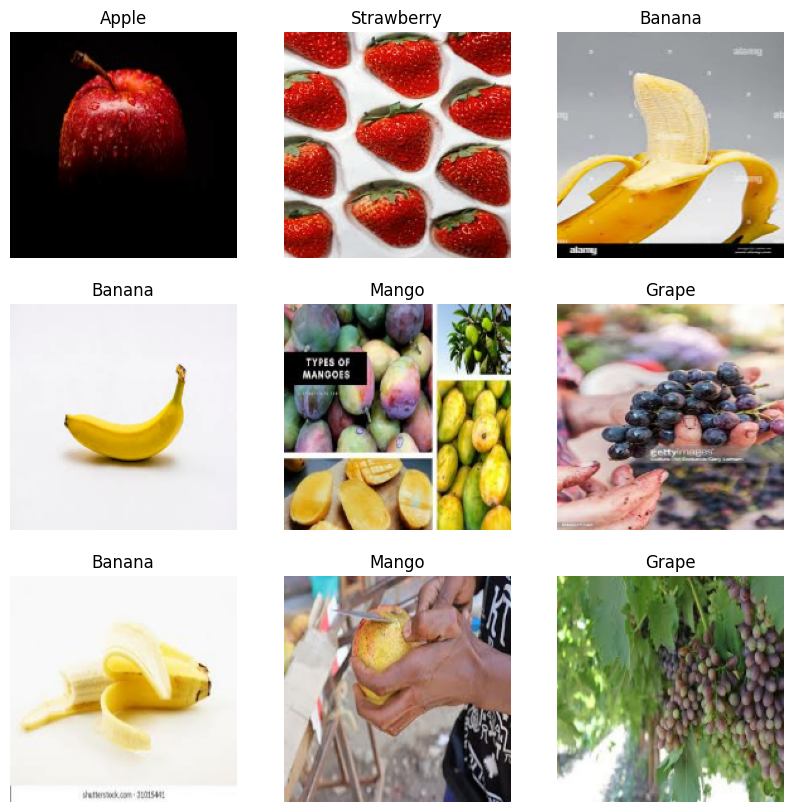

In [6]:
plt.figure(figsize=(10, 10))

for images, labels in dataset.take(1):  # Pegar um lote de imagens
    
    for i in range(9):  # Mostrar as primeiras 9 imagens
        
        ax = plt.subplot(3, 3, i + 1) # exibição das imagens 3X3
        
        plt.imshow(images[i].numpy().astype("uint8"))
        
        plt.title(nomes_classes[labels[i]]) # para mostrar o nome da classe
        
        plt.axis("off")
        
plt.show()

## Divisão do conjunto de dados

In [25]:
#divisão de treinamento e teste



51.0